In [1]:
import re
import string
from collections import Counter

import pandas as pd
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from tqdm import tqdm

In [2]:
train_ds, test_ds = pd.read_csv("./data/train.csv"), pd.read_csv("./data/test.csv")
print("Describe train dataset:")
train_ds.describe()

Describe train dataset:


,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11117


In [3]:
print("Describe test dataset:")
test_ds.describe()

Describe test dataset:


,textID,text,sentiment
count,3534,3534,3534
unique,3534,3534,3
top,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
freq,1,1,1430


In [4]:
train_ds.groupby(["sentiment"]).count()["text"].reset_index().sort_values(by="text")

,sentiment,text
0,negative,7781
2,positive,8582
1,neutral,11117


<Axes: xlabel='sentiment', ylabel='count'>

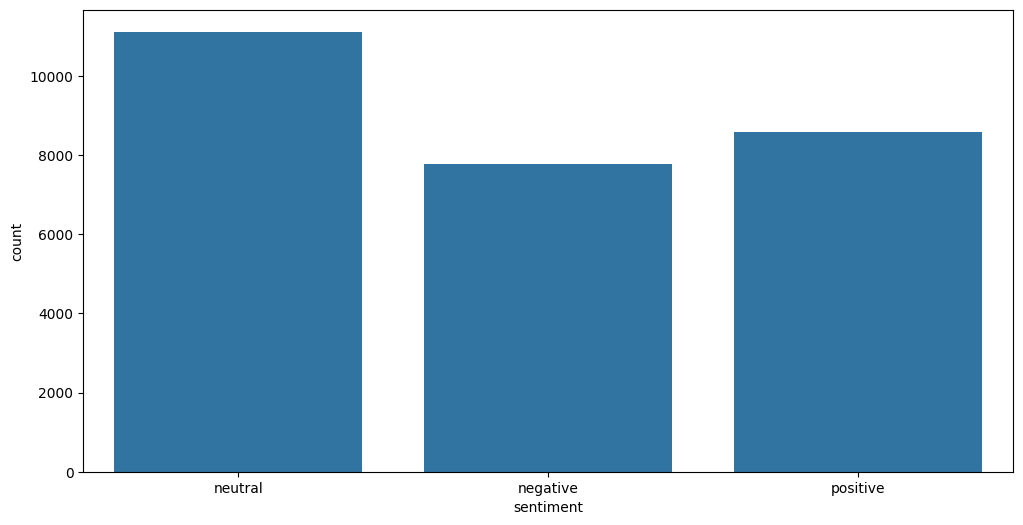

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(x="sentiment", data=train_ds)


In [6]:
def jaccard(str1, str2):
    a = set(str1.lower().split())
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))


In [8]:

results_jaccard = []

for ind, row in tqdm(train_ds.iterrows()):
    sentence1 = row.text
    sentence2 = row.selected_text

    jaccard_score = jaccard(sentence1, sentence2)
    results_jaccard.append([sentence1, sentence2, jaccard_score])

jaccard_df = pd.DataFrame(
    results_jaccard, columns=["text", "selected_text", "jaccard_score"]
)
train = train_ds.merge(jaccard_df, how="outer")

27480it [00:00, 74923.94it/s]


In [9]:
train["num_words_st"] = train["selected_text"].apply(lambda x: len(str(x).split()))
train["num_words_text"] = train["text"].apply(lambda x: len(str(x).split()))
train["difference_in_words"] = train["num_words_text"] - train["num_words_st"]
train.head()

,textID,text,selected_text,sentiment,jaccard_score,num_words_st,num_words_text,difference_in_words
0,0fab80d6b2,\tREALLY?? oh.. sorry yall lol,sorry,negative,0.200000,1,5,4
1,8106d4c6fa,_beckett Thanks so much !,beckett Thanks,positive,0.166667,2,5,3
2,3792c7b13e,You`ll be missed!! Bring me back a key...,You`ll be miss,negative,0.222222,3,8,5
3,b58a92fe10,get lit I am http://bit.ly/OASQR,get lit I am http://bit.ly/,neutral,0.666667,5,5,0
4,18180bb2ec,Good morning to you ! Its so pretty outs...,Its so pr,positive,0.181818,3,10,7


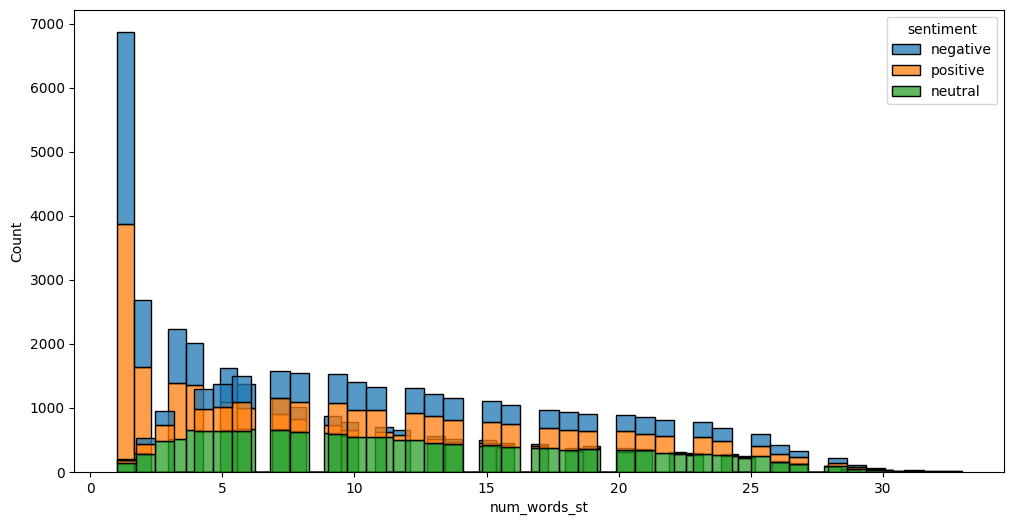

In [11]:
hist_data = [train["num_words_st"], train["num_words_text"]]
group_labels = ["selected_text", "text"]
plt.figure(figsize=(12, 6))
sns.histplot(data=train, x="num_words_st", hue="sentiment", multiple="stack")
sns.histplot(data=train, x="num_words_text", hue="sentiment", multiple="stack")
plt.show()

/var/folders/9_/1hgh1v7s0tjbvrclkmfy35q80000gp/T/ipykernel_47431/4011123512.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p1 = sns.kdeplot(train["num_words_st"], shade=True, color="r").set_title(
/var/folders/9_/1hgh1v7s0tjbvrclkmfy35q80000gp/T/ipykernel_47431/4011123512.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p1 = sns.kdeplot(train["num_words_text"], shade=True, color="b")


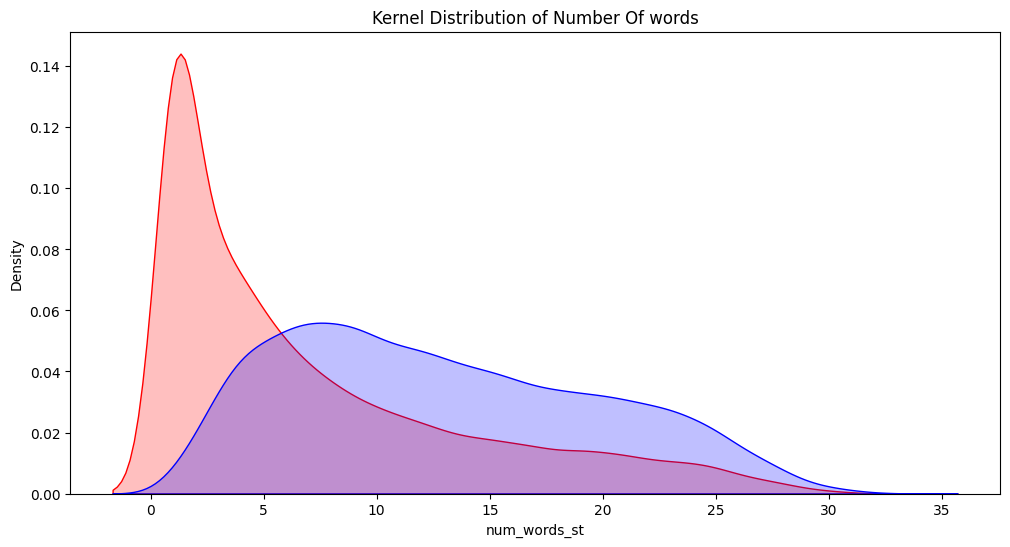

In [12]:
plt.figure(figsize=(12, 6))
p1 = sns.kdeplot(train["num_words_st"], shade=True, color="r").set_title(
    "Kernel Distribution of Number Of words"
)
p1 = sns.kdeplot(train["num_words_text"], shade=True, color="b")

/var/folders/9_/1hgh1v7s0tjbvrclkmfy35q80000gp/T/ipykernel_47431/663937200.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p1 = sns.kdeplot(
/var/folders/9_/1hgh1v7s0tjbvrclkmfy35q80000gp/T/ipykernel_47431/663937200.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p2 = sns.kdeplot(
/var/folders/9_/1hgh1v7s0tjbvrclkmfy35q80000gp/T/ipykernel_47431/663937200.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


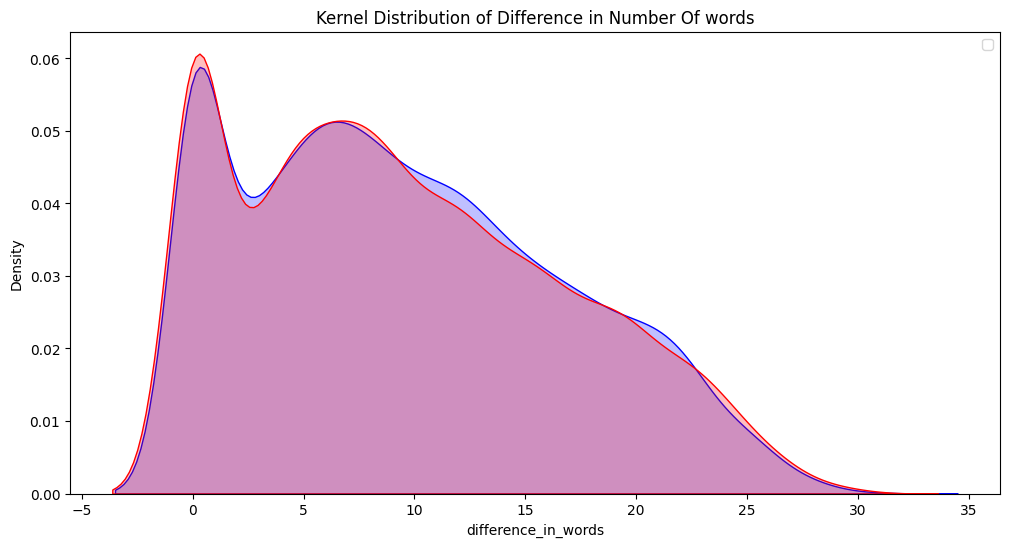

In [13]:
plt.figure(figsize=(12, 6))
p1 = sns.kdeplot(
    train[train["sentiment"] == "positive"]["difference_in_words"],
    shade=True,
    color="b",
).set_title("Kernel Distribution of Difference in Number Of words")
p2 = sns.kdeplot(
    train[train["sentiment"] == "negative"]["difference_in_words"],
    shade=True,
    color="r",
)
plt.legend()
plt.show()

/var/folders/9_/1hgh1v7s0tjbvrclkmfy35q80000gp/T/ipykernel_47431/659098891.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p1 = sns.kdeplot(
/var/folders/9_/1hgh1v7s0tjbvrclkmfy35q80000gp/T/ipykernel_47431/659098891.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p2 = sns.kdeplot(


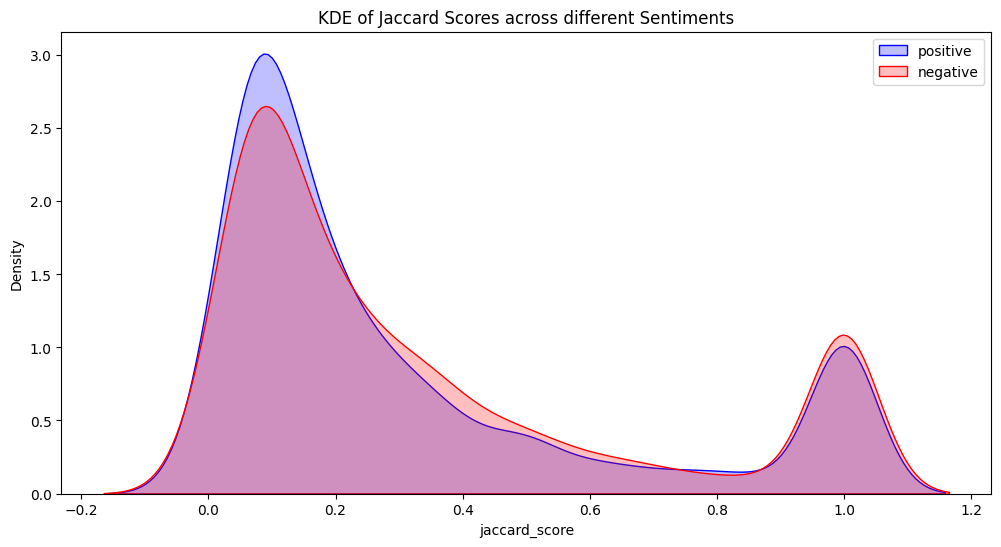

In [14]:
plt.figure(figsize=(12, 6))
p1 = sns.kdeplot(
    train[train["sentiment"] == "positive"]["jaccard_score"], shade=True, color="b"
).set_title("KDE of Jaccard Scores across different Sentiments")
p2 = sns.kdeplot(
    train[train["sentiment"] == "negative"]["jaccard_score"], shade=True, color="r"
)
plt.legend(labels=["positive", "negative"])

In [15]:

def clean_text(text):
    """Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers."""
    text = str(text).lower()
    text = re.sub("\\[.*?\\]", "", text)
    text = re.sub("https?://\\S+|www\\.\\S+", "", text)
    text = re.sub("<.*?>+", "", text)
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text)
    text = re.sub("\n", "", text)
    text = re.sub("\\w*\\d\\w*", "", text)
    return text


def remove_stopword(x):
    return [y for y in x if y not in stopwords.words("english")]



In [16]:
train["text"] = train["text"].apply(lambda x: clean_text(x))
train["selected_text"] = train["selected_text"].apply(lambda x: clean_text(x))
train["temp_list"] = train["selected_text"].apply(lambda x: str(x).split())
train["temp_list"] = train["temp_list"].apply(lambda x: remove_stopword(x))
train.head()

,textID,text,selected_text,sentiment,jaccard_score,num_words_st,num_words_text,difference_in_words,temp_list
0,0fab80d6b2,\treally oh sorry yall lol,sorry,negative,0.200000,1,5,4,[sorry]
1,8106d4c6fa,beckett thanks so much,beckett thanks,positive,0.166667,2,5,3,"[beckett, thanks]"
2,3792c7b13e,youll be missed bring me back a keychain,youll be miss,negative,0.222222,3,8,5,"[youll, miss]"
3,b58a92fe10,get lit i am,get lit i am,neutral,0.666667,5,5,0,"[get, lit]"
4,18180bb2ec,good morning to you its so pretty outsi...,its so pr,positive,0.181818,3,10,7,[pr]


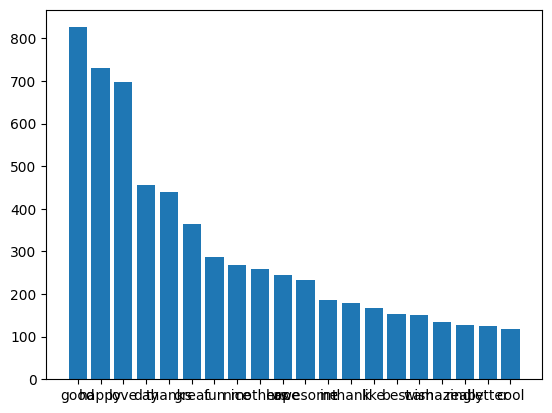

In [23]:
Positive_sent = train[train["sentiment"] == "positive"]
Negative_sent = train[train["sentiment"] == "negative"]
Neutral_sent = train[train["sentiment"] == "neutral"]
top = Counter([item for sublist in Positive_sent["temp_list"] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ["Common_words", "count"]
plt.bar(
    temp_positive["Common_words"],
    temp_positive["count"],
    orientation='vertical'
)
plt.show()
